# Tutorial 1 - Getting started with data

In [1]:
import os
from IPython import display

In [2]:
import imagingplus as ip


imported packerlabimaging successfully
	version: 0.1-beta



This notebook demonstrates a basic workflow of through packerlabimaging, taking raw input files to create a multi-level pre-processed data object.

The fundamental types of imaging trials accepted for this workflow are: 
 - 2photon imaging
 - All Optical Experiment (2photon imaging + optogenetic stimulation)
 - Suite2p processing results output

This tutorial is based off an imaging experiment that includes various imaging trials of 2photon imaging only and all optical experiments:

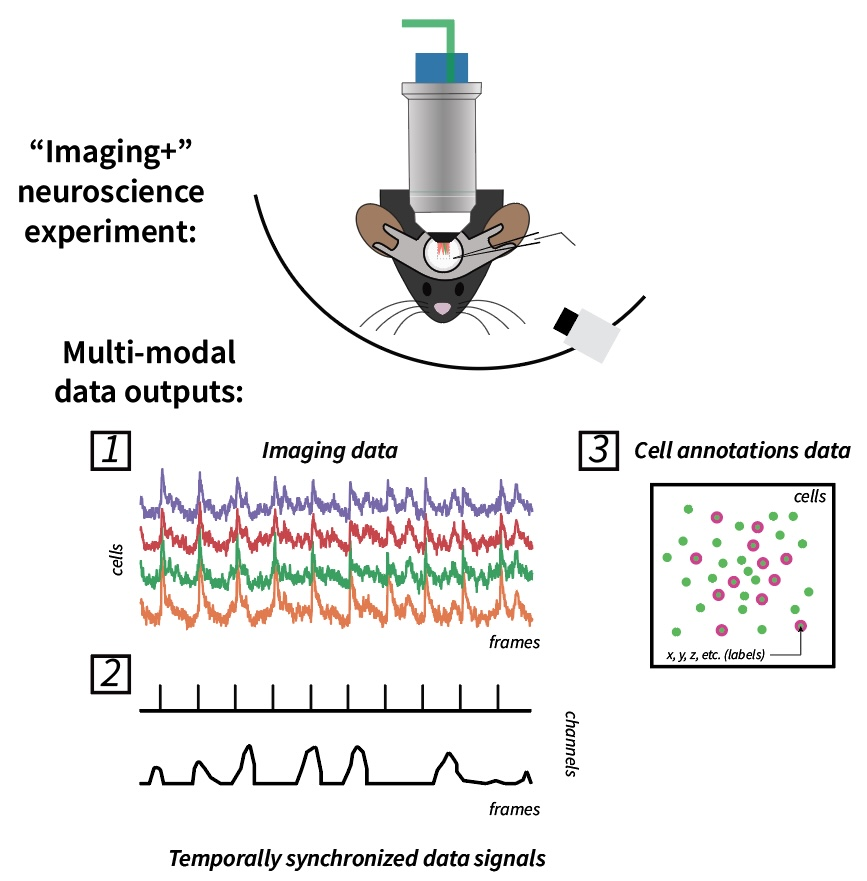

In [3]:
display.Image("/home/pshah/Documents/code/packerlabimaging/docs/source/files/Typical-experiment-apr-22-2022.jpeg")

## Creating an experiment

The first step towards starting the analysis pipeline and creating the `Experiment` object is to create a dictionary (`ExperimentMetainfo`) to collect the metadata fields required for initializing `Experiment`. In `ExperimentMetainfo`, we provide initial information about the experiment. 

In [4]:
ExperimentMetainfo = {
    'dataPath': '/home/pshah/mnt/qnap/Data/2020-12-19',  #: main dir where the imaging data is contained
    'saveDir': '/mnt/qnap_share/Data/packerlabimaging-example/',  #: main dir where the experiment object and the trial objects will be saved to
    "expID": 'RL109',  #: given identification name for experiment
    'comment': 'date: 2020-12-19',  #: notes related to experiment
}

# create Experiment

expobj = ip.Experiment(**ExperimentMetainfo)
# expobj = ip.import_obj('/home/pshah/Documents/code/packerlabimaging/tests/RL109_analysis.pkl')


***********************
CREATING new Experiment: (expID: RL109)
***********************



saving new pkl object at: /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl

	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl -- 



******************************
NEW Experiment created: 

packerlabimaging Experiment object (last saved: Thu Aug  4 09:05:21 2022), expID: RL109
file path: /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl



### Load Experiment

Once created, the new Experiment gets saved to the disk using python's pickle protocol at the location specified in the `saveDir` field while creating the Experiment.

In [5]:
# we can now load the new expobj from disk storage using pickle in ip.import_obj():
expobj = ip.import_obj('/mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl')


|- Loaded packerlabimaging.Experiment object (expID: RL109)



In [6]:
# saving the Experiment object can be done anytime to disk from `expobj.save()`:
expobj.save()

# to save the Experiment with a custom path, provide a custom .pkl path and use the .save_pkl() method:
expobj.save_pkl(pkl_path='/mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl')


	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl -- 

saving new pkl object at: /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl

	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl -- 


In [7]:
# Note that this updates the save path for this object:
print(expobj.pkl_path)

/mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl


## Adding trials to an experiment

After creating the initial `Experiment`, we move onto adding each trial acquisition from the experiment. 

We create each `ImagingTrial` session by creating a Metainfo dictionary that contains meta-information about each trial. 

The `ImagingTrial` is the primary data container and the object that we will interact with most directly througout all steps of the package.

As a rule of thumb, `ImagingTrial`s within one `Experiment` should be from the same FOV. There's no strict constraint against a multi-FOV `Experiment`, but the workflow is not currently directly designed for multi-FOV analysis. 




There are two types of built-in `ImagingTrial`s: `TwoPhotonImaging` and `AllOpticalTrial`.

We start with two 2-photon imaging trials. We create a dictionary (`TwoPhotonImagingMetainfo`) to dump into a `TwoPhotonImagingTrial`.

### Two-Photon Imaging Trial


\- Adding Imaging Acquisition Metadata from Bruker 2pPlus ...

	\- Parsing PV Metadata for Bruker microscope...
	 searching for xml path in tiff path directory at: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-005 ... 
	n planes: 1 
	n frames: 14880 
	fps: 29.75971618277715 
	frame size (px): 512 y 512 
	zoom: 1.0 
	pixel size (um): 2.18458479264539 2.18458479264539 
	scan centre (V): 0.0 0.0
	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_005.paq
	 - loaded 8 channels from .Paq file: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']

\- ADDING PAQ DATA from /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_005.paq... 
	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_005.paq


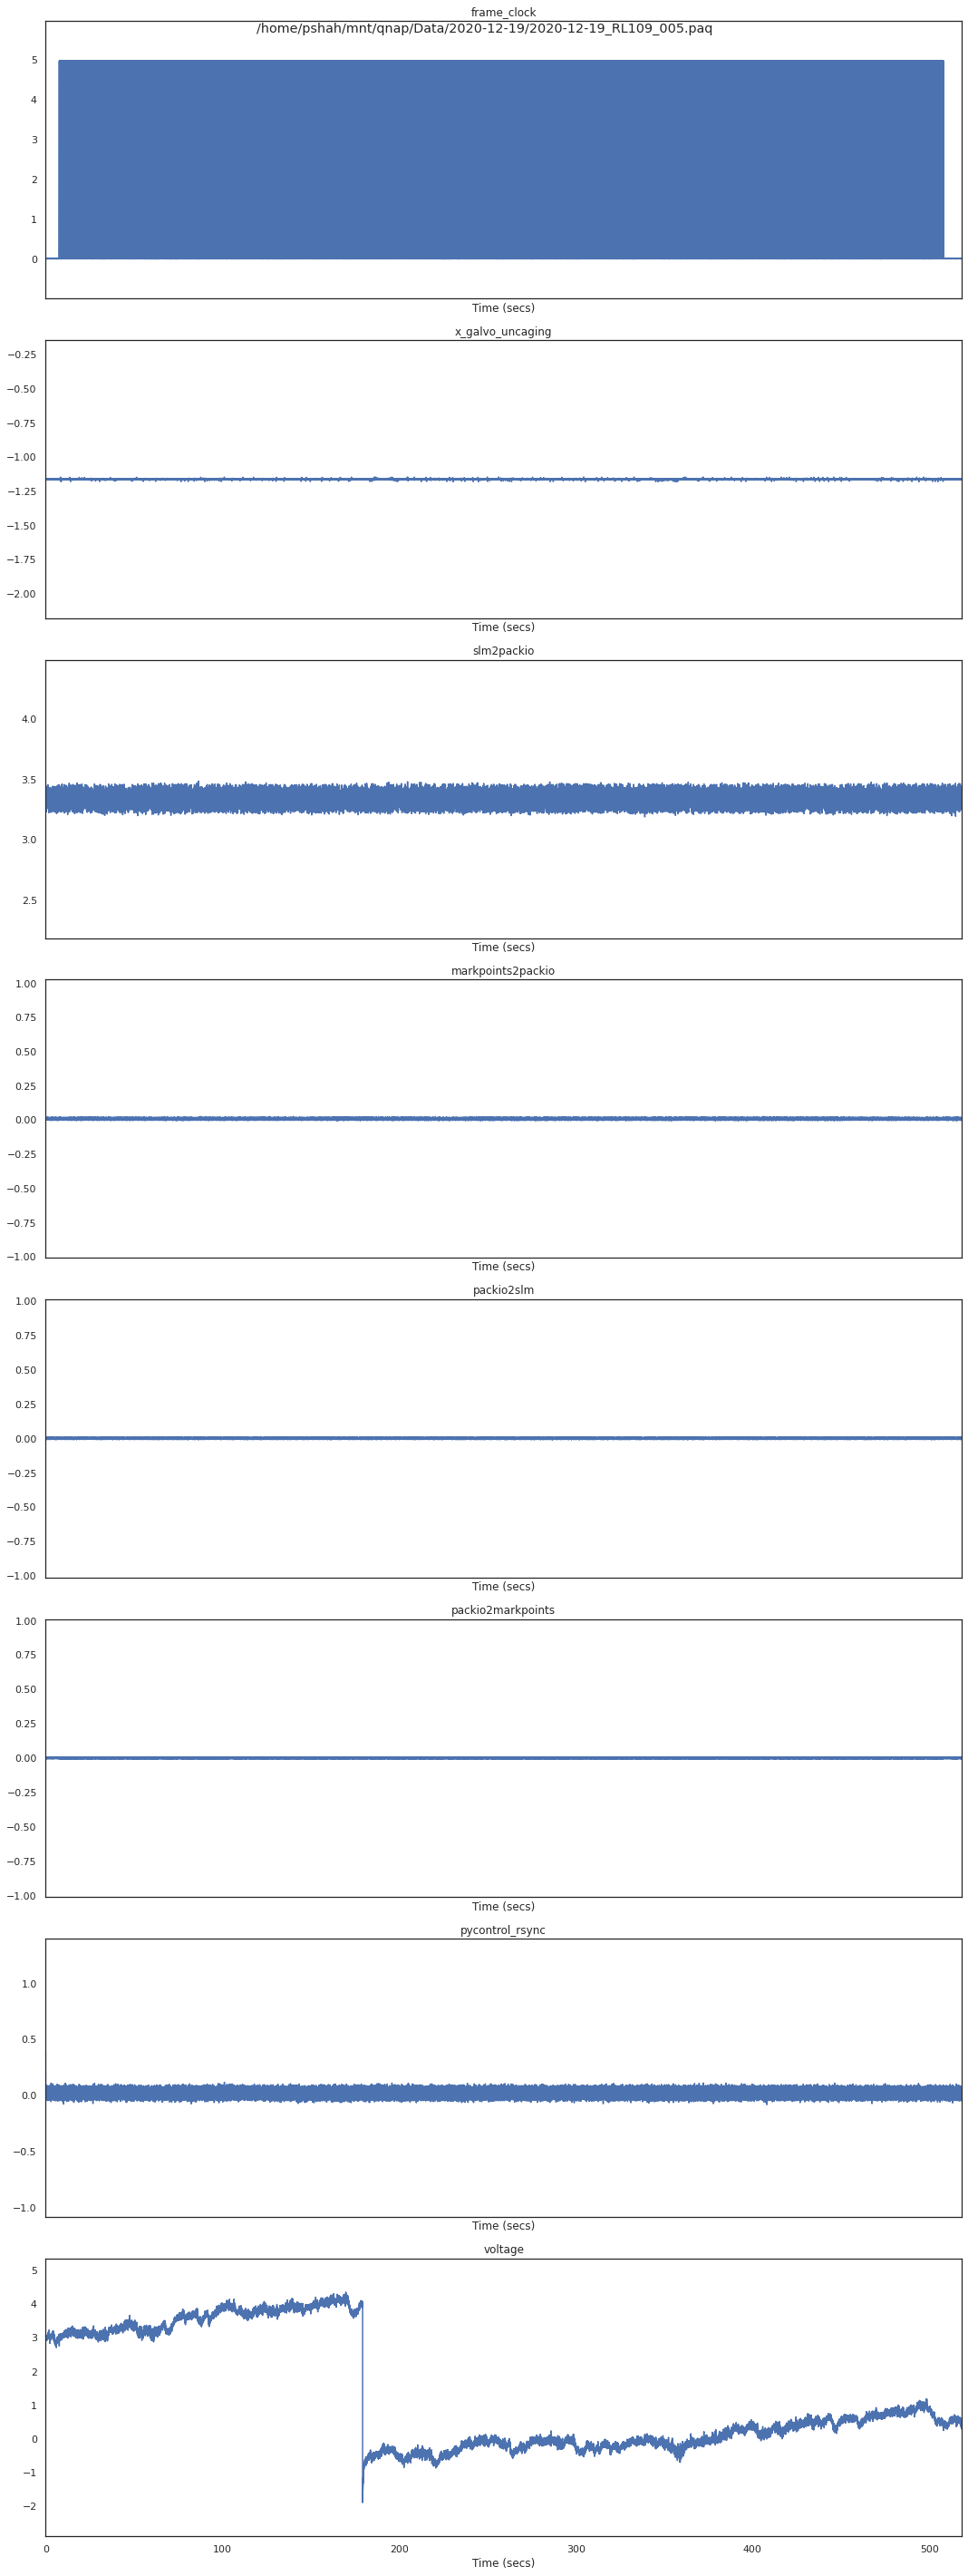

	 - loaded 8 channels from .Paq file: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']
Created new TemporalData of 8 x 10370240 (sampled at 20000

	\- Retrieving two-photon imaging frame times from .paq channel: frame_clock ... 

	\- Getting imaging key frames timed cellsdata from 14887 frames ... 
		\- Adding sparse tmdata for channel: frame_clock 
		\- Adding sparse tmdata for channel: x_galvo_uncaging 
		\- Adding sparse tmdata for channel: slm2packio 
		\- Adding sparse tmdata for channel: markpoints2packio 
		\- Adding sparse tmdata for channel: packio2slm 
		\- Adding sparse tmdata for channel: packio2markpoints 
		\- Adding sparse tmdata for channel: pycontrol_rsync 
		\- Adding sparse tmdata for channel: voltage 
	|- Collected sparse data:  (14887, 8) ... 
\----- CREATING TwoPhotonImagingTrial for trial: t-005

-----collecting mean raw flu trace from tiff file...
saving new trial object to: /

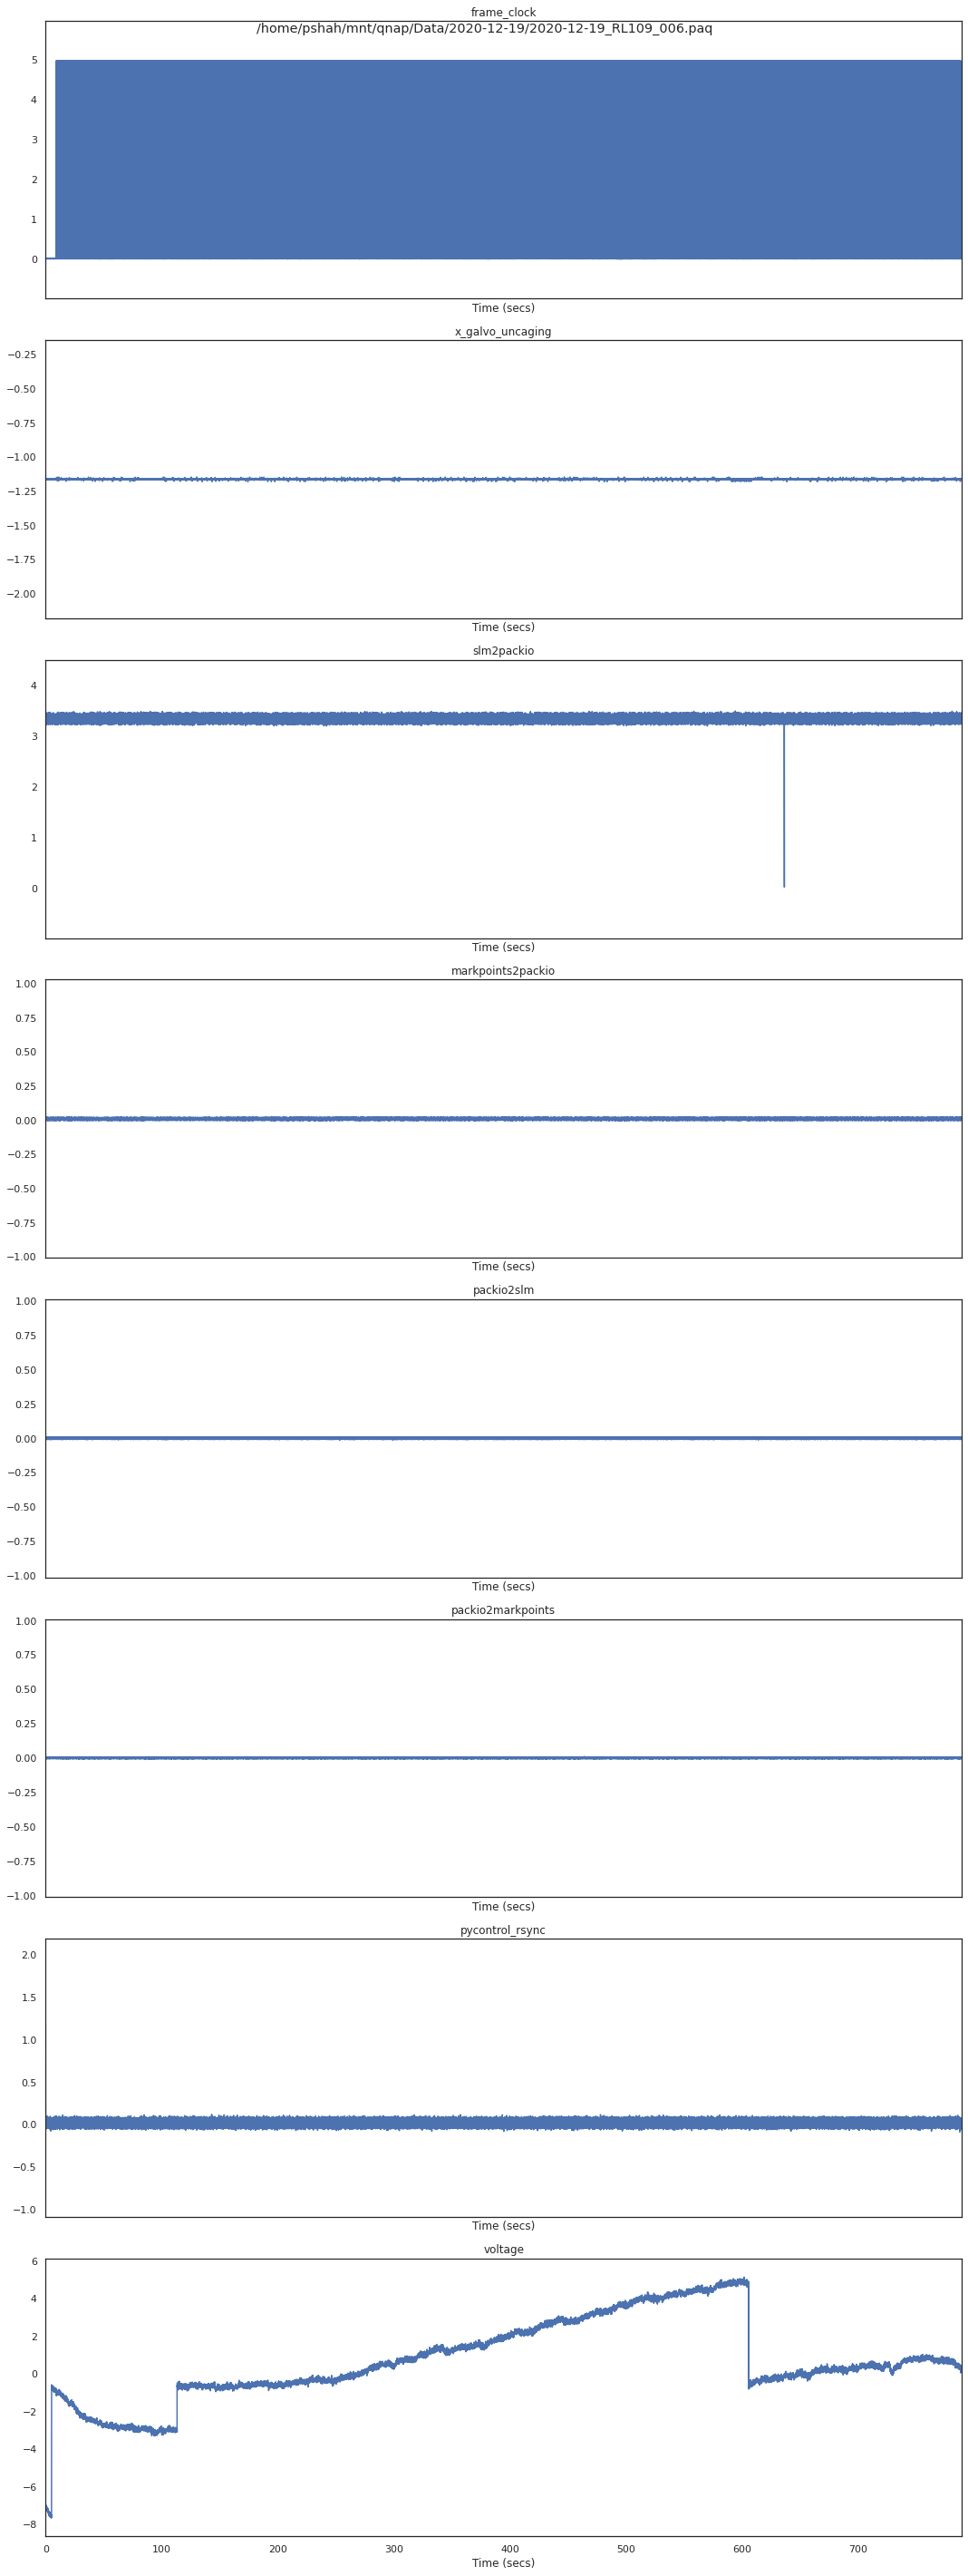

	 - loaded 8 channels from .Paq file: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']
Created new TemporalData of 8 x 15788192 (sampled at 20000

	\- Retrieving two-photon imaging frame times from .paq channel: frame_clock ... 

	\- Getting imaging key frames timed cellsdata from 23181 frames ... 
		\- Adding sparse tmdata for channel: frame_clock 
		\- Adding sparse tmdata for channel: x_galvo_uncaging 
		\- Adding sparse tmdata for channel: slm2packio 
		\- Adding sparse tmdata for channel: markpoints2packio 
		\- Adding sparse tmdata for channel: packio2slm 
		\- Adding sparse tmdata for channel: packio2markpoints 
		\- Adding sparse tmdata for channel: pycontrol_rsync 
		\- Adding sparse tmdata for channel: voltage 
	|- Collected sparse data:  (23181, 8) ... 
\----- CREATING TwoPhotonImagingTrial for trial: t-006

-----collecting mean raw flu trace from tiff file...
saving new trial object to: /

In [8]:
# when we create the imaging trial, we also add modules for parsing simultaneously temporal data (.paq files) and imaging microscope's parameters for this imaging trial
from packerlabimaging.processing.paq import PaqData
from packerlabimaging.processing.imagingMetadata import PrairieViewMetadata


# create trial obj for each trial of experiment

trials_list_spont = ['t-005', 't-006']
for idx, trial in enumerate(trials_list_spont):
    date = '2020-12-19'
    prep = expobj.expID

    # define paths to retrieve data from disc
    paqs_loc = f'/home/pshah/mnt/qnap/Data/2020-12-19/{date}_{prep}_{trial[-3:]}.paq'  # path to the .paq files for the selected trials
    dataPath = f'/home/pshah/mnt/qnap/Data/2020-12-19/{date}_{trial}/{date}_{trial}_Cycle00001_Ch3.tif'
    
    
    # initialize microscope meta-data for current imaging trial using pre-built module for Bruker-PrairieView xml parser
    imparams = PrairieViewMetadata(pv_xml_dir=os.path.dirname(dataPath), microscope='Bruker 2pPlus')
    
    # initialize temporal data using pre-built module for .paq parsing 
    tmdata = PaqData.paqProcessingTwoPhotonImaging(paq_path=paqs_loc, frame_channel='frame_clock', plot=False)
    
    # feed in information into `TwoPhotonImaging` to create a TwoPhotonImaging object
    trialobj = ip.TwoPhotonImaging(date=date, trialID= trial, expID= prep, imparams =  imparams, tmdata= tmdata,
                                saveDir=f'/mnt/qnap_share/Data/packerlabimaging-example/packerlabimaging-test-analysis/',
                                dataPath= dataPath, expGroup= "awake spont. 2p imaging + LFP")
    

    # add each Trial to the overall Experiment using the trialobj
    expobj.add_imaging_trial(trialID=trial, trialobj=trialobj)

In [9]:
# save the experiment object after adding new trials
expobj.save()
print(expobj)


	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl -- 
packerlabimaging Experiment object (last saved: Thu Aug  4 09:06:55 2022), expID: RL109
file path: /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl

trials in Experiment object:
	t-005: awake spont. 2p imaging + LFP
	t-006: awake spont. 2p imaging + LFP



We can see above now that our `Experiment` contains two newly added `TwoPhotonImagingTrial`.

In [10]:
# we can access each trial's information from within the `expobj`
expobj.TrialsInformation

{'t-005': {'date': '2020-12-19',
  'trialID': 't-005',
  'expID': 'RL109',
  'expGroup': 'awake spont. 2p imaging + LFP',
  'comment': '',
  'paths': {'dataPath': '/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-005/2020-12-19_t-005_Cycle00001_Ch3.tif',
   'pkl_path': '/mnt/qnap_share/Data/packerlabimaging-example/packerlabimaging-test-analysis/2020-12-19_t-005.pkl',
   'data_path': '/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-005/2020-12-19_t-005_Cycle00001_Ch3.tif',
   'data_path_dir': '/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-005'}},
 't-006': {'date': '2020-12-19',
  'trialID': 't-006',
  'expID': 'RL109',
  'expGroup': 'awake spont. 2p imaging + LFP',
  'comment': '',
  'paths': {'dataPath': '/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-006/2020-12-19_t-006_Cycle00001_Ch3.tif',
   'pkl_path': '/mnt/qnap_share/Data/packerlabimaging-example/packerlabimaging-test-analysis/2020-12-19_t-006.pkl',
   'data_path': '/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-0

In [11]:
# we can also load each trial directly from the experiment:
trialobj = expobj.load_trial(trialID = 't-005')


|- Loaded 'RL109 t-005 (TwoPhotonImagingTrial experimental object)'maging-test-analysis/2020-12-19_t-005.pkl ... 



### AllOptical Trial

Next, we will add an `AllOpticalTrial` to our `Experiment`.


\- Adding Imaging Acquisition Metadata from Bruker 2pPlus ...

	\- Parsing PV Metadata for Bruker microscope...
	 searching for xml path in tiff path directory at: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-013 ... 
	n planes: 1 
	n frames: 16368 
	fps: 29.75972061098135 
	frame size (px): 512 y 512 
	zoom: 1.0 
	pixel size (um): 2.18458479264539 2.18458479264539 
	scan centre (V): 0.0 0.0
	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_013.paq
	 - loaded 8 channels from .Paq file: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']

\- ADDING PAQ DATA from /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_013.paq... 
	loading Paq cellsdata from: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_013.paq


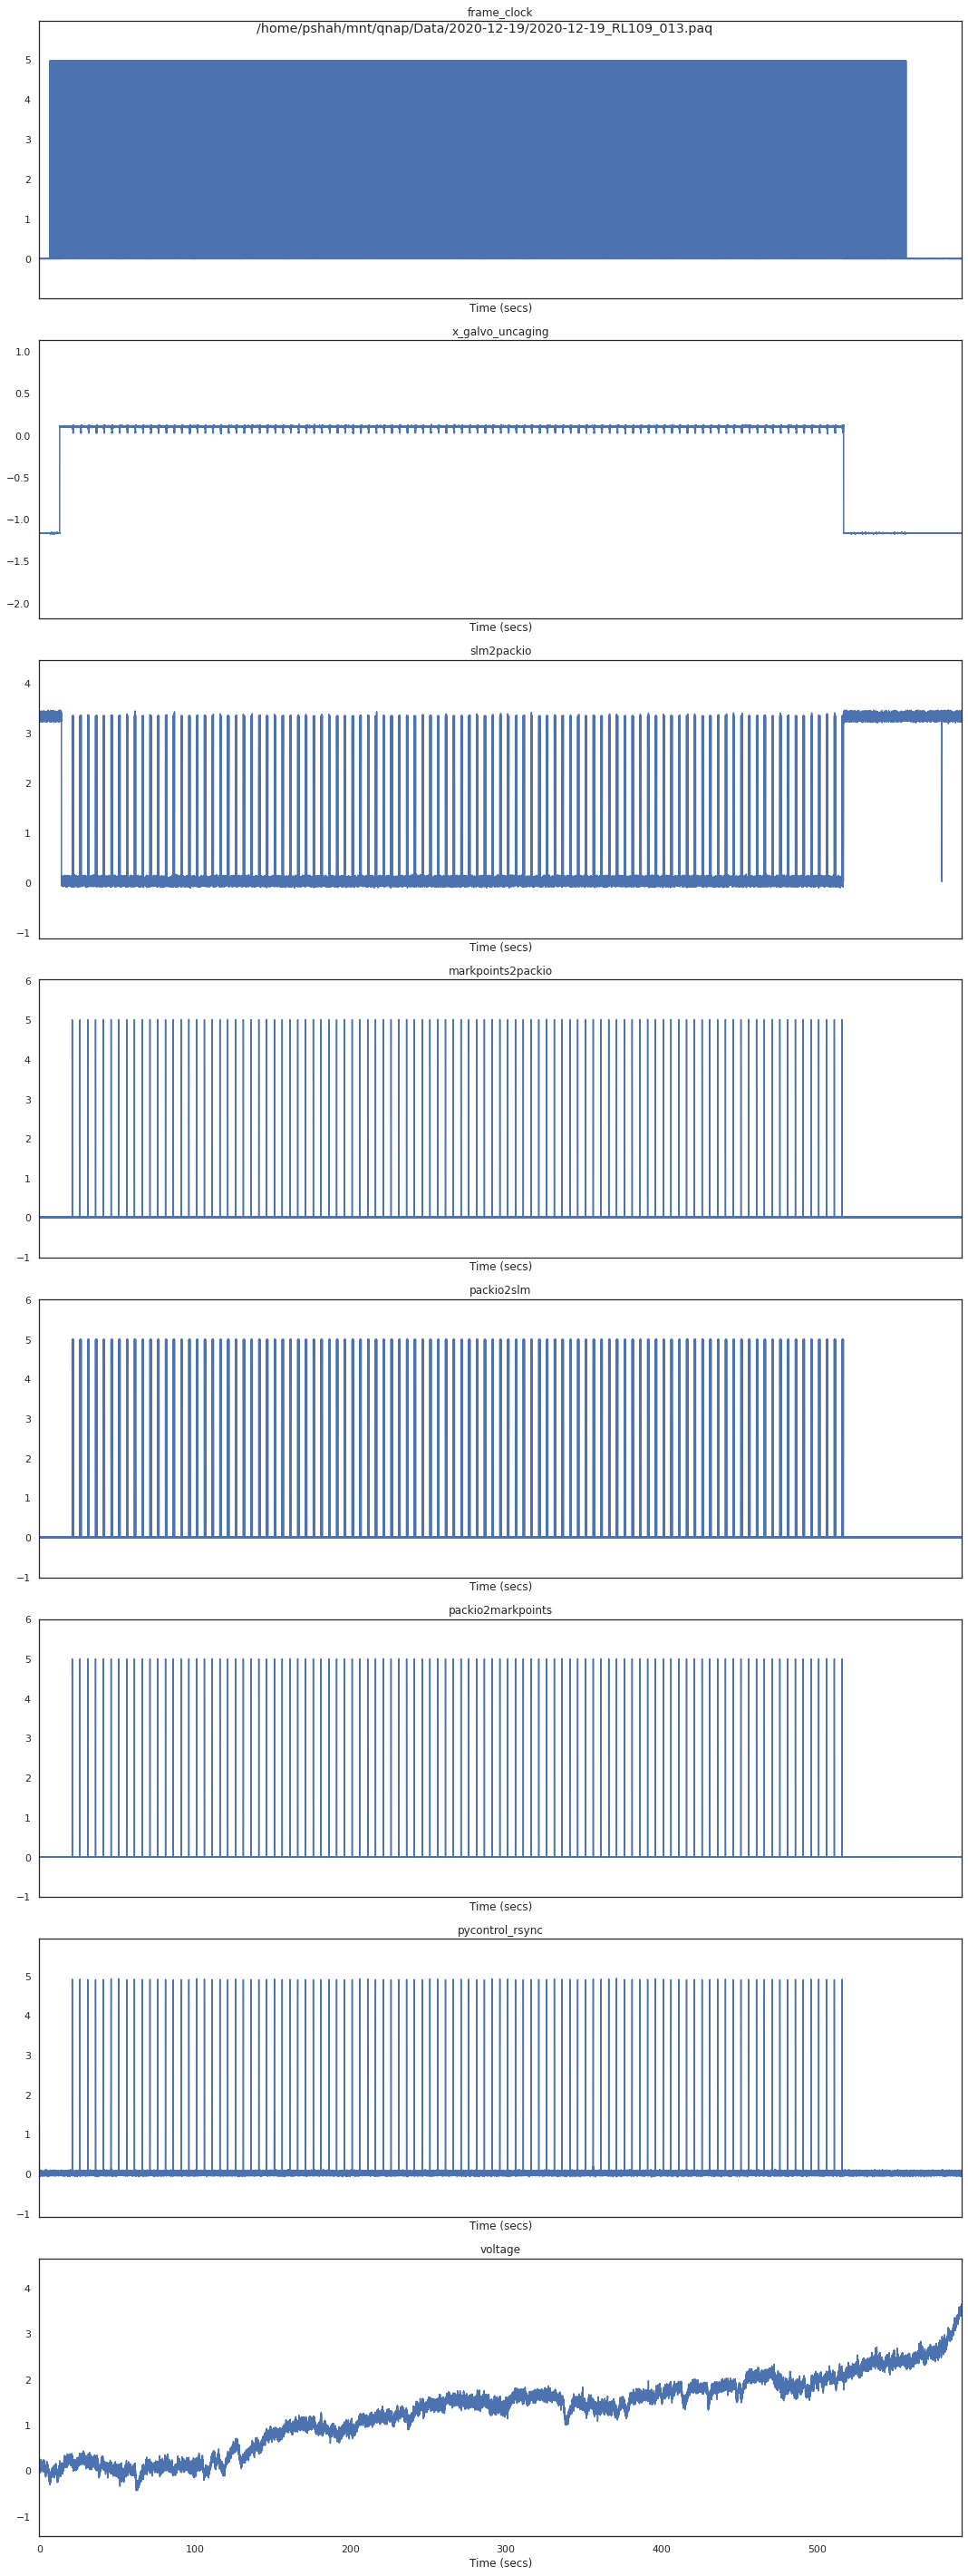

	 - loaded 8 channels from .Paq file: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']
Created new TemporalData of 8 x 11864768 (sampled at 20000

	\- Retrieving two-photon imaging frame times from .paq channel: frame_clock ... 

	\- Getting imaging key frames timed cellsdata from 16376 frames ... 
		\- Adding sparse tmdata for channel: frame_clock 
		\- Adding sparse tmdata for channel: x_galvo_uncaging 
		\- Adding sparse tmdata for channel: slm2packio 
		\- Adding sparse tmdata for channel: markpoints2packio 
		\- Adding sparse tmdata for channel: packio2slm 
		\- Adding sparse tmdata for channel: packio2markpoints 
		\- Adding sparse tmdata for channel: pycontrol_rsync 
		\- Adding sparse tmdata for channel: voltage 
	|- Collected sparse data:  (16376, 8) ... 
# of stims found on markpoints2packio: 100


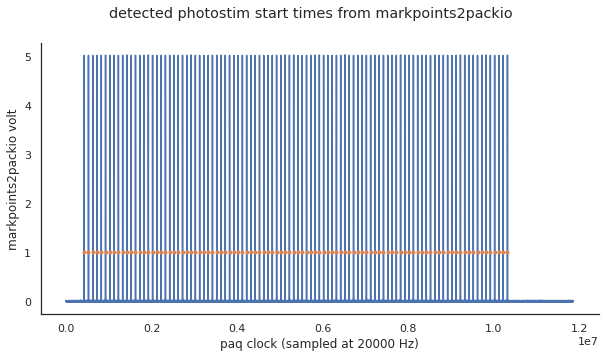

In [12]:
from packerlabimaging.processing.paq import PaqData
from packerlabimaging.processing.imagingMetadata import PrairieViewMetadata


date = '2020-12-19'
prep = expobj.expID

# define paths to retrieve data from disc
paqs_loc = f'/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_013.paq'  # path to the .paq files for the selected trials
dataPath = f'/home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-013/2020-12-19_t-013_Cycle00001_Ch3.tif'


initialization_dict = {'naparm_path': f'/home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/',
                       'dataPath': dataPath,
                       'saveDir': f'/home/pshah/mnt/qnap/Data/2020-12-19/',
                       'date': '2020-12-19',
                       'trialID': 't-013',
                       'expID': 'RL109',
                       'expGroup': 'all optical trial with LFP',
                       'comment': 'n/a'}

# parses imaging system cellsdata
imparams = PrairieViewMetadata(pv_xml_dir=os.path.dirname(dataPath), microscope='Bruker 2pPlus')

# sets the stim start frames
tmdata = PaqData.paqProcessingAllOptical(paq_path=paqs_loc, frame_channel='frame_clock',
                                         stim_channel='markpoints2packio', plot=False)
    

In [13]:
# create a sparse version of all temporal data series timealigned to frame times
tmdata.sparse_data = tmdata.get_sparse_data()


	\- Getting imaging key frames timed cellsdata from 16376 frames ... 
		\- Adding sparse tmdata for channel: frame_clock 
		\- Adding sparse tmdata for channel: x_galvo_uncaging 
		\- Adding sparse tmdata for channel: slm2packio 
		\- Adding sparse tmdata for channel: markpoints2packio 
		\- Adding sparse tmdata for channel: packio2slm 
		\- Adding sparse tmdata for channel: packio2markpoints 
		\- Adding sparse tmdata for channel: pycontrol_rsync 
		\- Adding sparse tmdata for channel: voltage 
	|- Collected sparse data:  (16376, 8) ... 


In [14]:
# create the trial
aotrial = ip.AllOpticalTrial(imparams=imparams, tmdata=tmdata, **initialization_dict)

\----- CREATING TwoPhotonImagingTrial for trial: t-013

-----collecting mean raw flu trace from tiff file...
saving new trial object to: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-013.pkl

	 -- data object saved to /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-013.pkl -- 

	 -- data object saved to /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_t-013.pkl -- 

\----- parsing Naparm xml file...
loading NAPARM_xml_path:
['/home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/2020-12-19_RL109_ps_014.xml']
	Numbers of trials: 100 
	Number of groups: 4 
	Number of shots: 10 
	Number of sequence reps: 1 
	Inter-point delay: 5 
	Spiral Duration (ms): 20

\----- parsing Naparm gpl file...
['/home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/2020-12-19_RL109_ps_014.gpl']
loading NAPARM_gpl_path:  /home/pshah/mnt/qnap/Data/2020-12-19/photostim/2020-12-19_RL109_ps_014/2020-12-19_RL109_ps_014.gpl
Single stim dur (ms): 10
Spiral size .gpl file: 0.0475

In [15]:
expobj.add_imaging_trial(trialobj=aotrial)




\- ADDING trial: t-013 to RL109 experiment
	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl -- 
|- ADDED trial: t-013 to RL109 experiment


In [16]:
print(expobj)

packerlabimaging Experiment object (last saved: Thu Aug  4 09:09:47 2022), expID: RL109
file path: /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl

trials in Experiment object:
	t-005: awake spont. 2p imaging + LFP
	t-006: awake spont. 2p imaging + LFP
	t-013: all optical trial with LFP



In [17]:
# save the experiment object after adding new trials
expobj.save()



	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl -- 


## Adding calcium imaging processing to Experiment

After creating the Experiment and loading each Trial, we can move on to data analysis. 

We start with adding `Suite2p` functionality to our Experiment. 

We provide helpful wrapper functions that allow quick access `Suite2p` functionality directly from the `Experiment` or the `ImagingTrial`.

`Suite2p` results provides both `CellAnnotations` and `ImagingData` to each `ImagingTrial`

In [18]:
# we plan to use all trials from the experiment for Suite2p
expobj.add_suite2p(s2p_trials=['t-005', 't-006', 't-013'],
                  s2pResultsPath="/home/pshah/mnt/qnap/Analysis/2020-12-19/suite2p/alloptical-2p-1x-alltrials/plane0/")


\- Adding suite2p module to experiment. Located under .Suite2p
\----- Adding Suite2p results to .Suite2p module ...
Loading 640 traces labelled as cells
|- Loaded [640] suite2p classified cells from plane 0, recorded for 8533.93 secs total, 256018 frames total
|- ADDED .Suite2p module to Experiment object. 

|- Loaded 'RL109 t-005 (TwoPhotonImagingTrial experimental object)'maging-test-analysis/2020-12-19_t-005.pkl ... 


	|- current trial key_frames: (0, 14880) out of 256018 total key_frames processed through suite2p
\- added CellAnnotations module. consisting of 15 annotations x 640 cells.
\- added ImagingData module. consisting of (640, 14880) ROIs x Frames.

\----- ADDED .Suite2p module to trial. 
	 -- data object saved to /mnt/qnap_share/Data/packerlabimaging-example/packerlabimaging-test-analysis/2020-12-19_t-005.pkl -- 

|- Loaded 'RL109 t-006 (TwoPhotonImagingTrial experimental object)'maging-test-analysis/2020-12-19_t-006.pkl ... 


	|- current trial key_frames: (14880, 38053)

In [19]:
# save the experiment object after adding new trials
expobj.save()

expobj.save_pkl('/mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl')


	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_duplicate_analysis.pkl -- 

saving new pkl object at: /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl

	|- Experiment analysis object saved to /mnt/qnap_share/Data/packerlabimaging-example/RL109_analysis.pkl -- 


In [20]:
# direct access to important Suite2p outputs from ImagingTrial and the Experiment instances
print(expobj.Suite2p)

Suite2p Results (Experiment level) Object, containing trials: 
	['t-005', 't-006', 't-013']


In [21]:
aotrial.Suite2p

### Load all-optical trial

In [22]:
aotrial = expobj.load_trial(trialID = 't-013')


|- Loaded TwoPhotonImagingTrial.alloptical experimental trial object ... 



## Storing Suite2p processed data as an anndata structure

In [23]:
# create annotated data object 

# anndata storage submodule
aotrial.data = aotrial.create_anndata(imdata=aotrial.Suite2p,
                                     cells=aotrial.Suite2p,
                                     tmdata=aotrial.tmdata.sparse_data,
                                     imdata_type='suite2p raw - neuropil corrected')



\----- CREATING annotated cellsdata object using AnnData:
Created AnnData object: 
	Annotated Data of n_obs (# ROIs) × n_vars (# Frames) = 640 × 16368

Annotated Data of n_obs × n_vars = 640 × 16368 
available attributes: 
	.X (primary datamatrix) of .data_label: 
		|- suite2p raw - neuropil corrected
	.obs (obs metadata): 
		|- 'ypix', 'xpix', 'lam', 'footprint', 'mrs', 'mrs0', 'compact', 'med', 'npix', 'overlap', 'radius', 'aspect_ratio', 'npix_norm', 'skew', 'std'
	.var (vars metadata): 
		|- 'frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage'
	.obsm: 
		|- 'ypix', 'xpix'


In [26]:
# all data streams can be accessed directly out of one variable (yes, one variable!!)
aotrial.data.X

array([[352.13678 , 411.9472  , 280.92416 , ..., 401.3014  , 515.2566  ,
        541.41565 ],
       [192.22421 , 395.29306 , 330.7496  , ..., 257.25806 , 285.31506 ,
        126.660484],
       [336.64996 , 539.26746 , 219.30368 , ..., 423.15295 , 433.1515  ,
        220.52742 ],
       ...,
       [308.56497 , 303.55536 , 413.3554  , ..., 482.61044 , 386.2576  ,
        283.1643  ],
       [133.96815 , 122.96908 ,  84.63106 , ..., 109.2256  , 187.91866 ,
        159.50813 ],
       [252.49574 , 240.2455  , 273.2785  , ..., 181.601   , 229.0061  ,
        278.74188 ]], dtype=float32)